# Simulating Dynamics of Networks
## Watts and Strogatz’s Small-World network

```Source: Section 16.3 of Sayama, H. (2015). Introduction to the modeling and analysis of complex systems. Open SUNY Textbooks, Milne Library. Genesco, NY.```

Small-world networks by random edge rewiring In 1998, Duncan Watts and Steven Strogatz addressed this paradox, that social networks are “small” yet highly clustered locally, by introducing the small-world network model.


The original model assumptions:
1. The initial network topology is a ring-shaped network made of n nodes. Each node is connected to k nearest neighbors (i.e., k/2 nearest neighbors clockwise and k/2 nearest neighbors counterclockwise) by undirected edges.
2. Each edge is subject to random rewiring with probability p. If selected for random rewiring, one of the two ends of the edge is reconnected to a node that is randomly chosen from the whole network. If this rewiring causes duplicate edges, the rewiring is canceled.

The revised model assumptions:
1. The initial network topology is the same as described above.
2. In each edge rewiring event, a node is randomly selected from the whole network. The node drops one of its edges randomly, and then creates a new edge to a new node that is randomly chosen from the whole network (excluding those to which the node is already connected).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
from pylab import *
import random as rd

In [4]:
# Code 16.10

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            g.add_edge(i, (i + j) % n)
            g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def initialize_grid():
    global g
    g = nx.grid_graph(dim=[5, 5])
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)
    plt.show()
    
def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

The Small-World network after 0  time steps



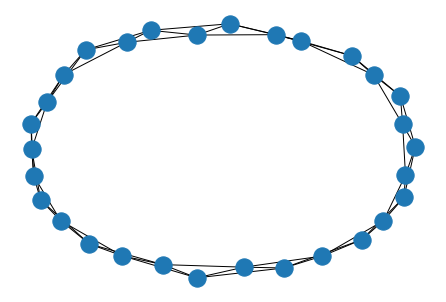

The Small-World network after 100  time steps



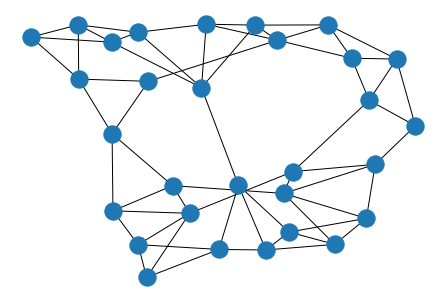

The Small-World network after 200  time steps



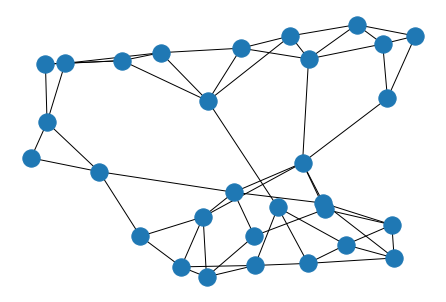

The Small-World network after 300  time steps



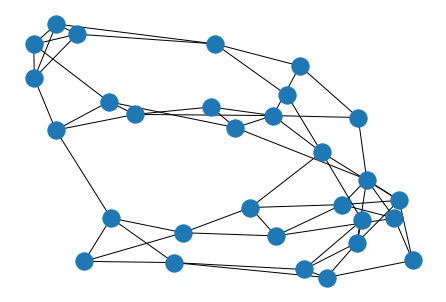

The Small-World network after 400  time steps



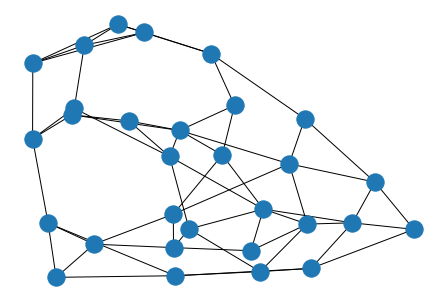

The Small-World network after 500  time steps



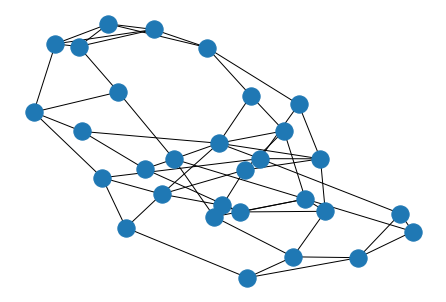

In [3]:
initialize()
for i in range(0, 501):
    update()
    if i%100 == 0:
        print("The Small-World network after",i," time steps\n")
        observe()

```For your information, NetworkX already has a built-in graph generator function for Watts-Strogatz small-world networks, watts_strogatz_graph(n, k, p). Here, n is the number of nodes, k is the degree of each node, and p is the edge rewiring probability. If you don’t need to simulate the formation of small-world networks iteratively, you should just use this function instead.```

**Sayama Exercise 16.14.**

Revise the small-world network formation model above so that the network is initially a two-dimensional grid in which each node is connected to its four neighbors. (north, south, east, and west; except for those on the boundaries of the space). Then run the simulations, and see how random edge rewiring changes the topology of the network.

Two-Dimensional grid network after 0  time steps



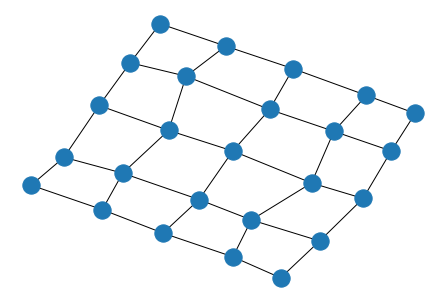

Two-Dimensional grid network after 100  time steps



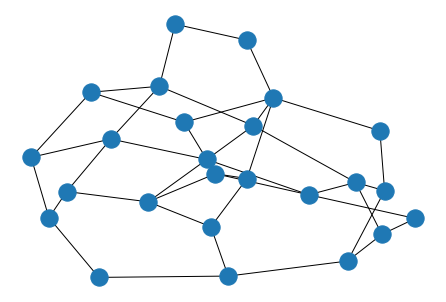

Two-Dimensional grid network after 200  time steps



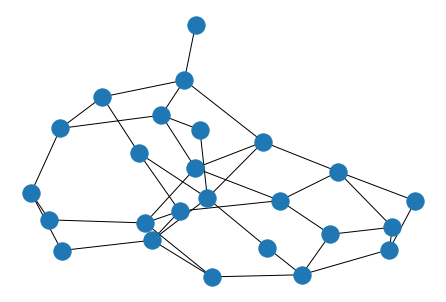

Two-Dimensional grid network after 300  time steps



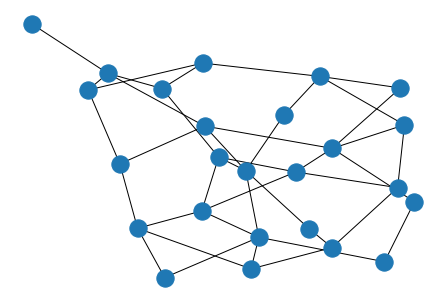

Two-Dimensional grid network after 400  time steps



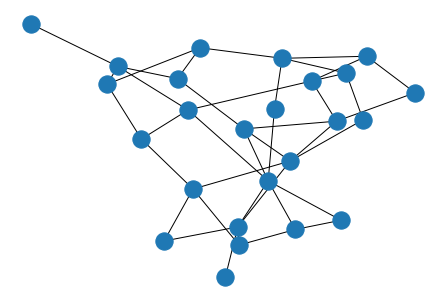

Two-Dimensional grid network after 500  time steps



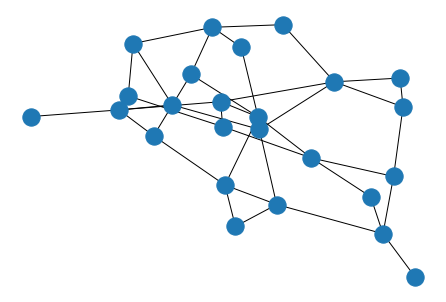

In [5]:
initialize_grid()
for i in range(0, 501):
    update()
    if i%100 == 0:
        print("Two-Dimensional grid network after",i," time steps\n")
        observe()

## Barabási-Albert's Small-World network

Albert-Laszl Barabási and Reka Albert published another very influential paper [57] about a new model that could explain both the small-world property and large variations of node degrees in a network. The Barabasi-Albert model ´ described self-organization of networks over time caused by a series of network growth events with preferential attachment. Their model assumptions were as follows:

1. The initial network topology is an arbitrary graph made of $m_0$ nodes. There is no specific requirement for its shape, as long as each node has at least one connection (so its degree is positive).
2. In each network growth event, a newcomer node is attached to the network by m edges $m\leq m_0$. The destination of each edge is selected from the network of existing nodes using the following selection probabilities:

$$p\left(i\right)=\frac{\deg\left(i\right)}{\sum_j^{ }\deg\left(j\right)}$$

Here $p(i)$ is the probability for an existing node $i$ to be connected by a newcomer node, which is proportional to its degree (preferential attachment).

**Sayama Exercise 16.15.** 

Simulate the Barabási-Albert network growth model with m  = 1 , m  = 3 , and m  = 5 , and see how the growth process may be affected by the variation of this parameter.

In [9]:
m0 = 5 # number of nodes in initial condition
# m = 2 number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)
    #plt.show()
    
def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [10]:
def Barabási_Albert_network(m, timesteps):
    plt.figure(figsize=(15, 5))
    initialize()
    plt.subplot(1,2,1)
    plt.title('Initial configuration with $m=${}'.format(m),
              fontsize=15)
    observe()
    for i in range(timesteps):
        update(m)
    plt.subplot(1,2,2)
    plt.title('Final Configuration after {} time step'.format(timesteps),
              fontsize=15)
    observe()

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


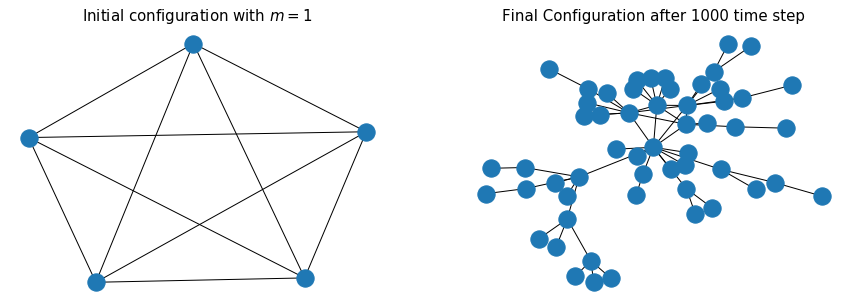

In [11]:
Barabási_Albert_network(1, 1000)

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


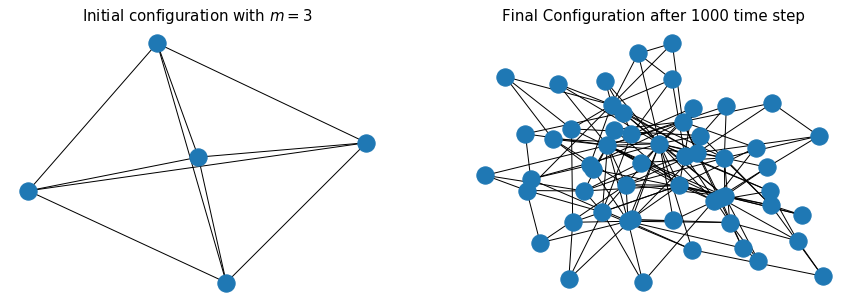

In [12]:
Barabási_Albert_network(3, 1000)

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


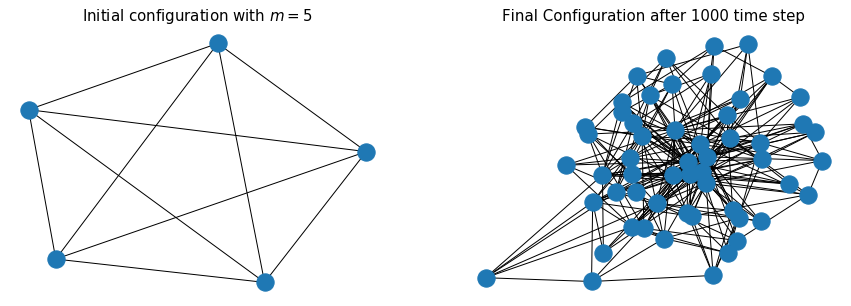

In [13]:
Barabási_Albert_network(5, 1000)

## Extra section

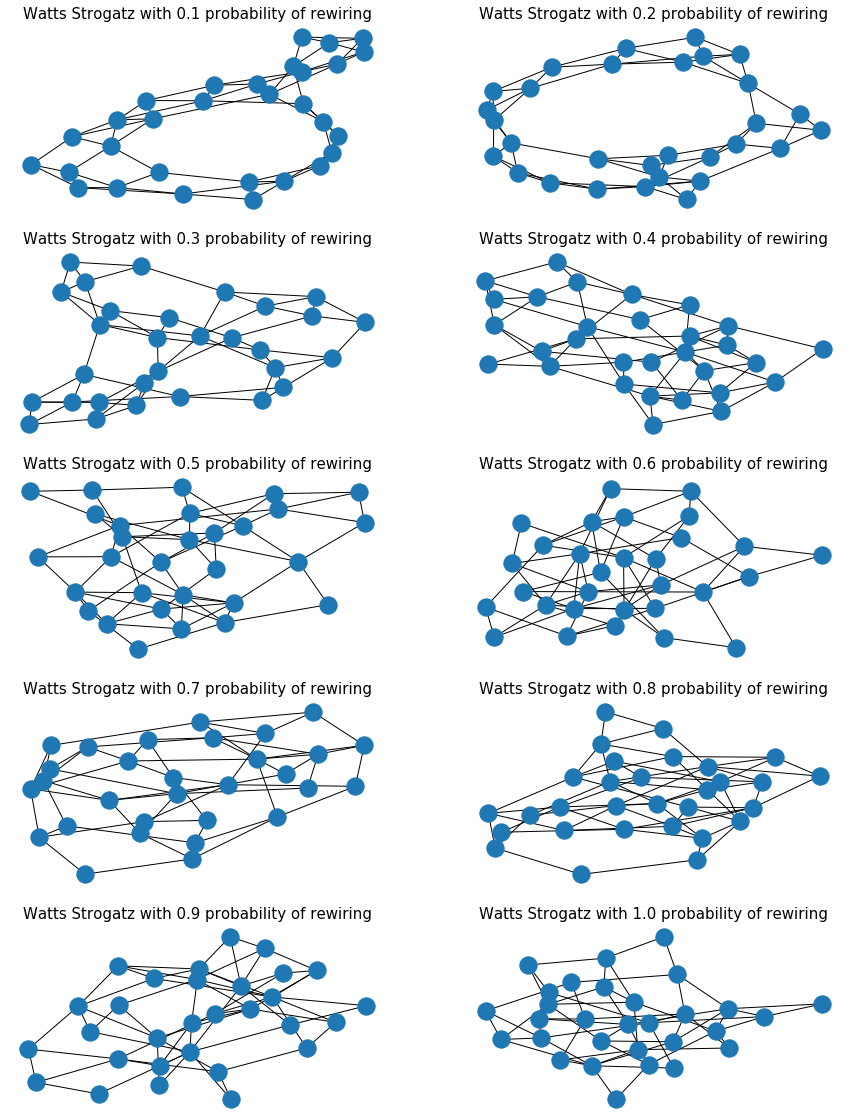

In [6]:
# Create a loop for 10 different probabilities or rewiring

plt.figure(figsize=(15, 20))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    nx.draw(nx.watts_strogatz_graph(30, 4, i/10)) # No, you have to run some time steps
    plt.title('Watts Strogatz with {} probability of rewiring'.format(i/10),
             fontsize=15)

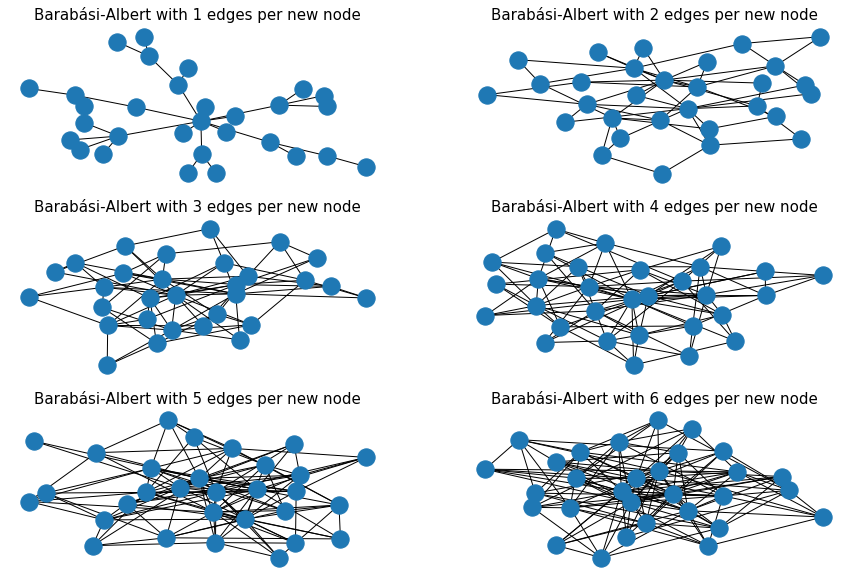

In [8]:
# Barabási-Albert preferential attachment model
plt.figure(figsize=(15, 10))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    nx.draw(nx.barabasi_albert_graph(30, i, 7))
    plt.title('Barabási-Albert with {} edges per new node'.format(i),
             fontsize=15)